<center>
<h2 style="color:blue;font-size:30px;">Artificial Intelligence CS-414</h2>
<h3 style="color:purple">Assignment 2</h3>
 </center>

<br>

<ol>
<li>Load the dataset.</li>
<li>Perform necessary preprocessing.</li>
<li>Train/use following models on the data sets using all the features.</li>
<ol type="a">
<li>Neural Network with one hidden layer (use number of hidden units ranging from 2-5)
<li>K-Nearest Neighbor (use appropriate distance metric and value of K to show your results)
    </ol>
<li>
Train NN models by initializing weights in two different ways (i) initialize weight vector with zero values (ii) initialize weight vector with small random values (for model 1 and 2 only). See the effect of training by keeping the learning rate fix at 0.01. Describe which weight initialization method is better and why in your report using iterations vs loss graphs.</li>
<li>
Once you are done with the finalizing which weight initialization method is more appropriate. Run your models (1 and 2) using different learning rates 0.1,0.05,0.01,0.005,0.001 and show comparison using training graphs.</li>
<li>
Perform the experiments by dividing your data sets into three different sets namely training set, validation set and test set. Demonstrate how your model is avoiding overfitting using early stopping.</li>
<li>
Validate your models using test sets and report their testing and training accuracies.</li>
<li>
Write a short report describing the problem, dataset and your produced results along with code and comments.</li>
</ol>
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings

<hr>
<h4 style="color:purple">TASKS</h4>
<ul><li>
<h3 style="color:purple">Task 1 : Load Dataset</h3></li></ul>

In [2]:
titn=pd.read_csv("titanic.csv")
titn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<hr><ul><li>
<h3 style="color:purple">Task 2 : Data Preprocessing</h3></li></ul>

In [3]:
titn1 = titn.copy()

In [4]:
null_age_count = titn1['Age'].isnull().sum()
null_age_count

177

In [5]:
male_survived_age_median = titn.loc[(titn1['Sex'] == 'male') & (titn1['Survived'] == 1), 'Age'].median()
male_death_age_median = titn1.loc[(titn1['Sex'] == 'male') & (titn1['Survived'] == 0), 'Age'].median()
female_survived_age_median = titn1.loc[(titn1['Sex'] == 'female') & (titn1['Survived'] == 1), 'Age'].median()
female_death_age_median = titn1.loc[(titn1['Sex'] == 'female') & (titn1['Survived'] == 0), 'Age'].median()

In [6]:
titn1.loc[(titn['Sex'] == 'male') & (titn1['Survived'] == 1), 'Age'] = titn1.loc[(titn['Sex'] == 'male') & (titn1['Survived'] == 1), 'Age'].fillna(male_survived_age_median)

In [7]:
titn1.loc[(titn1['Sex'] == 'male') & (titn1['Survived'] == 0), 'Age'] = titn1.loc[(titn1['Sex'] == 'male') & (titn1['Survived'] == 0), 'Age'].fillna(male_death_age_median)

In [8]:
titn1.loc[(titn1['Sex'] == 'female') & (titn1['Survived'] == 1), 'Age'] = titn1.loc[(titn1['Sex'] == 'female') & (titn1['Survived'] == 1), 'Age'].fillna(female_survived_age_median)

In [9]:
titn1.loc[(titn1['Sex'] == 'female') & (titn1['Survived'] == 0), 'Age'] = titn1.loc[(titn['Sex'] == 'female') & (titn1['Survived'] == 0), 'Age'].fillna(female_death_age_median)

In [10]:
titn1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [11]:
titn1['Family'] = titn1['SibSp'] + titn1['Parch'] + 1

In [12]:
titn1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
null_embarked_rows = titn1[titn1['Embarked'].isnull()]
null_embarked_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [14]:
filtered_data = titn1[(titn1['Sex'] == 'female') & (titn1['Age'] >= 38)]
embarked_counts = filtered_data['Embarked'].value_counts()
embarked_counts

Embarked
S    42
C    20
Q     1
Name: count, dtype: int64

In [15]:
titn1["Embarked"] = titn1["Embarked"].fillna("S")

In [16]:
null_fare_count = titn1['Fare'].isnull().sum()
null_fare_count

0

In [17]:
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
titn1 = titn1.drop(columns_to_drop, axis=1)
print(titn1.head()) 

   PassengerId  Survived  Pclass     Sex   Age     Fare Embarked  Family
0            1         0       3    male  22.0   7.2500        S       2
1            2         1       1  female  38.0  71.2833        C       2
2            3         1       3  female  26.0   7.9250        S       1
3            4         1       1  female  35.0  53.1000        S       2
4            5         0       3    male  35.0   8.0500        S       1


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

obj=LabelEncoder()
scaler = MinMaxScaler()

titn1['Sex']=obj.fit_transform(titn1['Sex'])
titn1['Embarked']=obj.fit_transform(titn1['Embarked'])

titn1[['Age', 'Fare']] = scaler.fit_transform(titn1[['Age', 'Fare']])

warnings.filterwarnings('ignore')
titn1.tail(5)

C:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Python310\lib\site-packages\s

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
886,887,0,2,1,0.334004,0.025374,2,1
887,888,1,1,0,0.233476,0.058556,2,1
888,889,0,3,0,0.302589,0.045771,2,4
889,890,1,1,1,0.321438,0.058556,0,1
890,891,0,3,1,0.396833,0.015127,1,1


In [19]:
inputs = np.array(titn1.filter(['Pclass','Sex','Age','Fare','Embarked','Family'], axis=1))
target = np.array(titn1['Survived'])

<hr><ul><li>
<h3 style="color:purple">Task 3 (B) - KNN</h3></li></ul>

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=4) 

In [21]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [22]:
k_range = range(1,20)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_pred,y_test))
score

[0.7835820895522388,
 0.8134328358208955,
 0.832089552238806,
 0.832089552238806,
 0.8395522388059702,
 0.8395522388059702,
 0.835820895522388,
 0.8134328358208955,
 0.8134328358208955,
 0.8208955223880597,
 0.8246268656716418,
 0.8246268656716418,
 0.832089552238806,
 0.8432835820895522,
 0.8395522388059702,
 0.8432835820895522,
 0.8432835820895522,
 0.8432835820895522,
 0.8395522388059702]

Text(0, 0.5, 'Score')

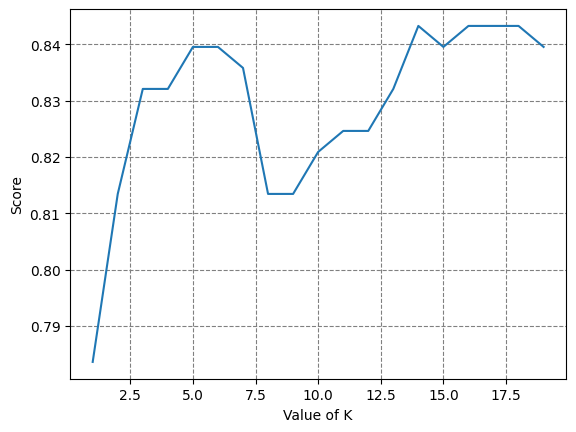

In [23]:
plt.plot(k_range, score)
plt.grid(True, linestyle='--', color='gray') 
plt.xlabel('Value of K')
plt.ylabel('Score')

<h5 style="color:purple">Result : </h2>
<p style="color:green"> k=14 with best score of 84%</p><hr>

<hr><ul><li>
<h3 style="color:purple">Task 3 (A) & 4 - Neural Network</h3></li></ul>

In [24]:
X = X_train
y = y_train  

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights = {
            'W1': None,
            'b1': np.zeros((1, hidden_size)),
            'W2': None,
            'b2': np.zeros((1, output_size))
        }
        self.params = ['W1', 'b1', 'W2', 'b2']

    def zero_initialize_weights(self):
        self.weights['W1'] = np.zeros((X.shape[1], 4))  
        self.weights['W2'] = np.zeros((4, 1))  

    def random_initialize_weights(self):
        self.weights['W1'] = np.random.randn(X.shape[1], 4) * 0.1 
        self.weights['W2'] = np.random.randn(4, 1) * 0.1 

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward_propagation(self, X):
        Z1 = np.dot(X, self.weights['W1']) + self.weights['b1']
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.weights['W2']) + self.weights['b2']
        A2 = self.sigmoid(Z2)
        return {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -1 / m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def backward_propagation(self, X, y, cache):
        m = X.shape[0]
        dZ2 = cache['A2'] - y
        dW2 = 1 / m * np.dot(cache['A1'].T, dZ2)
        db2 = 1 / m * np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = np.dot(dZ2, self.weights['W2'].T) * (cache['A1'] * (1 - cache['A1']))
        dW1 = 1 / m * np.dot(X.T, dZ1)
        db1 = 1 / m * np.sum(dZ1, axis=0, keepdims=True)
       
        grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
        return grads

    def update_parameters(self, grads, learning_rate):
        for param in self.params:
            self.weights[param] -= learning_rate * grads[f'd{param}']

    def train(self, X, y, initialization_method, learning_rate, epochs):
        if initialization_method == 'zero':
            self.zero_initialize_weights()
        elif initialization_method == 'random':
            self.random_initialize_weights()
        else:
            raise ValueError("Invalid initialization method")

        losses = []

        for epoch in range(epochs):
            cache = self.forward_propagation(X)
            loss = self.compute_loss(y, cache['A2'])
            losses.append(loss)
            grads = self.backward_propagation(X, y, cache)
            self.update_parameters(grads, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss {loss}")

        return losses
    
    def train_with_early_stopping(self, X_train, y_train, X_val, y_val, learning_rate, epochs):
        self.random_initialize_weights()

        train_losses = []
        val_losses = []
        best_loss = float('inf')
        best_epoch = 0
        early_stopping_patience = 20
        no_improvement_count = 0

        for epoch in range(epochs):
            train_cache = self.forward_propagation(X_train)
            train_loss = self.compute_loss(y_train, train_cache['A2'])
            train_losses.append(train_loss)
            train_grads = self.backward_propagation(X_train, y_train, train_cache)
            self.update_parameters(train_grads, learning_rate)

            val_cache = self.forward_propagation(X_val)
            val_loss = self.compute_loss(y_val, val_cache['A2'])
            val_losses.append(val_loss)

            if val_loss < best_loss:
                best_loss = val_loss
                best_epoch = epoch
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= early_stopping_patience:
                print(f"Best Weight {train_grads}. Best Learning Rate {learning_rate}.")
                print(f"Early stopping at epoch {epoch}. Best epoch: {best_epoch}.")
                break

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Training Loss {train_loss}, Validation Loss {val_loss}")

        return train_losses + val_losses


<hr><ul><li>
<h3 style="color:purple">Task 4 (i) & (ii)</h3></li></ul>

In [25]:
num_features = 6
# Training with zero initialization
model_zero = NeuralNetwork(num_features, 4, 1)
losses_zero = model_zero.train(X, y.reshape(-1, 1), initialization_method='zero', learning_rate=0.01, epochs=1000)

# Training with random initialization
model_random = NeuralNetwork(num_features, 4, 1)
losses_random = model_random.train(X, y.reshape(-1, 1), initialization_method='random', learning_rate=0.01, epochs=1000)

Epoch 0: Loss 0.6931471805599454
Epoch 100: Loss 0.6815601411469249
Epoch 200: Loss 0.677212092055109
Epoch 300: Loss 0.6755349533725602
Epoch 400: Loss 0.674851420198805
Epoch 500: Loss 0.674537520610582
Epoch 600: Loss 0.6743602531878687
Epoch 700: Loss 0.6742325497110527
Epoch 800: Loss 0.6741218172044547
Epoch 900: Loss 0.6740157495696352
Epoch 0: Loss 0.7035575703060735
Epoch 100: Loss 0.6834219218988524
Epoch 200: Loss 0.6767124440227945
Epoch 300: Loss 0.6743343007299191
Epoch 400: Loss 0.6733779793678496
Epoch 500: Loss 0.6728880363947899
Epoch 600: Loss 0.672546705621377
Epoch 700: Loss 0.6722472732842866
Epoch 800: Loss 0.6719532599929773
Epoch 900: Loss 0.6716515881808502


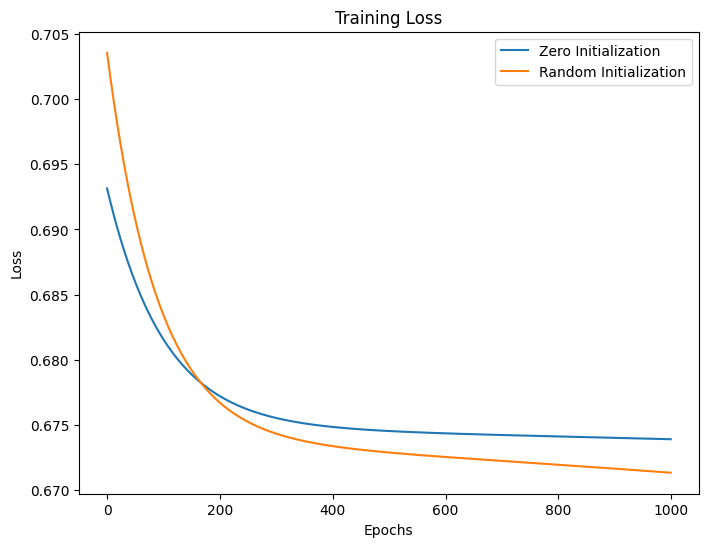

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(losses_zero, label='Zero Initialization')
plt.plot(losses_random, label='Random Initialization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

<hr><ul><li>
<h3 style="color:purple">Task 5</h3></li></ul>

In [27]:
def train_with_different_learning_rates(X, y, initialization_method, learning_rates, num_hidden_units=4, epochs=1000):
    all_losses = []

    for lr in learning_rates:
        model = NeuralNetwork(X.shape[1], num_hidden_units, 1)
        losses = model.train(X, y.reshape(-1, 1), initialization_method=initialization_method, learning_rate=lr, epochs=epochs)
        all_losses.append(losses)

    return all_losses

In [28]:
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]

zero_init_losses = train_with_different_learning_rates(X, y, initialization_method='zero', learning_rates=learning_rates)
random_init_losses = train_with_different_learning_rates(X, y, initialization_method='random', learning_rates=learning_rates)

Epoch 0: Loss 0.6931471805599454
Epoch 100: Loss 0.6739131395647621
Epoch 200: Loss 0.6726415207464992
Epoch 300: Loss 0.6707063695983997
Epoch 400: Loss 0.6677672998749178
Epoch 500: Loss 0.6635348397336462
Epoch 600: Loss 0.6577974693216939
Epoch 700: Loss 0.6504646397010343
Epoch 800: Loss 0.6416379121728459
Epoch 900: Loss 0.6316214844332035
Epoch 0: Loss 0.6931471805599454
Epoch 100: Loss 0.6745325400639312
Epoch 200: Loss 0.6739111431565391
Epoch 300: Loss 0.6733345978368799
Epoch 400: Loss 0.6726370528329227
Epoch 500: Loss 0.6717726751463984
Epoch 600: Loss 0.6706976685795548
Epoch 700: Loss 0.6693703660191217
Epoch 800: Loss 0.6677523252748225
Epoch 900: Loss 0.6658092384565384
Epoch 0: Loss 0.6931471805599454
Epoch 100: Loss 0.6815601411469249
Epoch 200: Loss 0.677212092055109
Epoch 300: Loss 0.6755349533725602
Epoch 400: Loss 0.674851420198805
Epoch 500: Loss 0.674537520610582
Epoch 600: Loss 0.6743602531878687
Epoch 700: Loss 0.6742325497110527
Epoch 800: Loss 0.67412181720

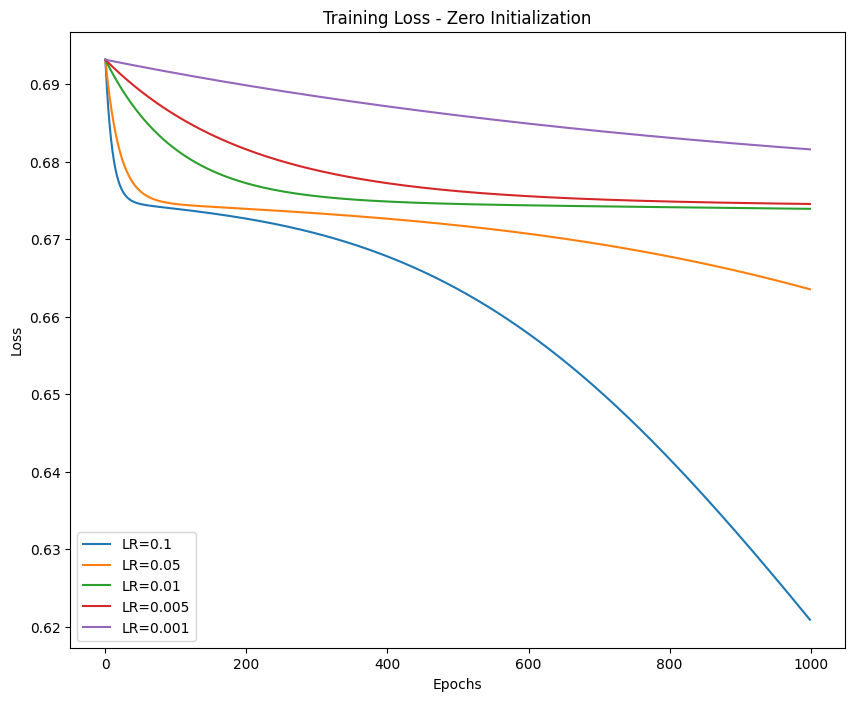

In [29]:
plt.figure(figsize=(10, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(zero_init_losses[i], label=f'LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss - Zero Initialization')
plt.legend()
plt.show()

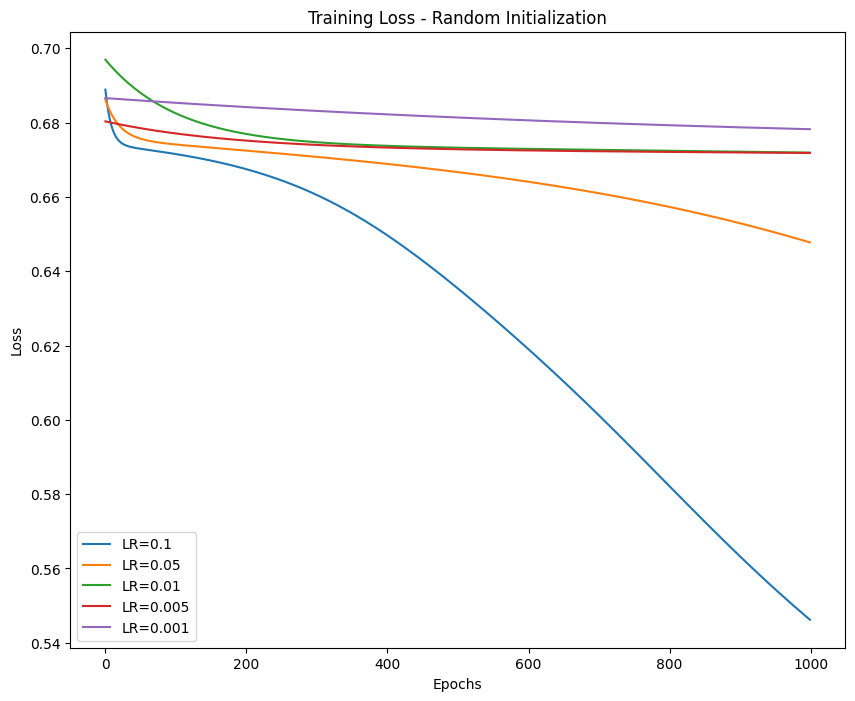

In [30]:
plt.figure(figsize=(10, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(random_init_losses[i], label=f'LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss - Random Initialization')
plt.legend()
plt.show()

<hr><ul><li>
<h3 style="color:purple">Task 6</h3></li></ul>

In [31]:
X_train, X_temp, y_train, y_temp = train_test_split(inputs, target, test_size=0.4, random_state=40)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40)

In [32]:
nn = NeuralNetwork(num_features, 4, 1)
combined_losses = nn.train_with_early_stopping(X_train, y_train.reshape(-1, 1), X_val, y_val.reshape(-1, 1), learning_rate=0.1, epochs=10000)

Epoch 0: Training Loss 0.6969818919950955, Validation Loss 0.6941240112042679
Epoch 100: Training Loss 0.6648754331415345, Validation Loss 0.6645843952993884
Epoch 200: Training Loss 0.6613651628471572, Validation Loss 0.6608777733607828
Epoch 300: Training Loss 0.6567493651070577, Validation Loss 0.6561142093393263
Epoch 400: Training Loss 0.6502843693649792, Validation Loss 0.6495484250241595
Epoch 500: Training Loss 0.6412568886456054, Validation Loss 0.6402939665379119
Epoch 600: Training Loss 0.6293032922874497, Validation Loss 0.6276909228650843
Epoch 700: Training Loss 0.6148550846974954, Validation Loss 0.6120835228795852
Epoch 800: Training Loss 0.5992952316606022, Validation Loss 0.5950857655157333
Epoch 900: Training Loss 0.5841305048461587, Validation Loss 0.5784755131420947
Epoch 1000: Training Loss 0.5701120634399892, Validation Loss 0.563095551625797
Epoch 1100: Training Loss 0.5573488241194094, Validation Loss 0.5490455865962085
Epoch 1200: Training Loss 0.5456032105914

In [33]:
half = len(combined_losses) // 2
train_losses = combined_losses[:half]
val_losses = combined_losses[half:]

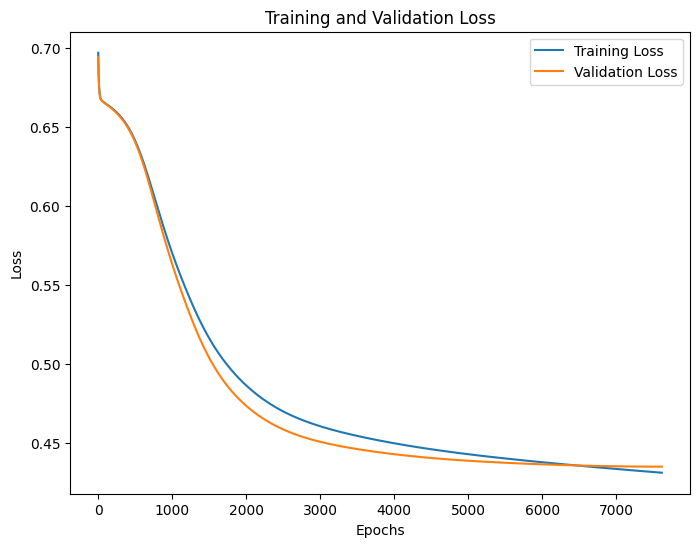

In [34]:
min_len = min(len(train_losses), len(val_losses))

# Plotting the training and validation losses up to the minimum length
plt.figure(figsize=(8, 6))
epochs = range(min_len)
plt.plot(epochs, train_losses[:min_len], label='Training Loss')
plt.plot(epochs, val_losses[:min_len], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

<hr><ul><li>
<h3 style="color:purple">Task 7</h3></li></ul>

In [35]:
best_weights = nn.weights.copy() 
nn.weights = best_weights 
test_cache = nn.forward_propagation(X_test)
test_loss = nn.compute_loss(y_test, test_cache['A2'])

print(f"Test Loss: {test_loss}")
print(f"Best weight: {nn.weights}")

Test Loss: 183.20932789012463
Best weight: {'W1': array([[ 0.18188832, -1.09878015,  1.02757316, -0.36788141],
       [ 0.01558974, -1.84560055,  0.911001  ,  3.17367794],
       [-0.80506975, -0.50191323,  0.23362833,  1.49010744],
       [ 0.11920727,  0.31737504, -0.11619342, -0.2218693 ],
       [-0.17088746, -0.28285254, -0.22245121,  0.09788665],
       [-0.48457247, -0.0506219 ,  0.10184437, -0.9683643 ]]), 'b1': array([[ 1.26540638,  2.78841756, -1.47275418, -1.30588322]]), 'W2': array([[ 2.45804956],
       [ 4.44763356],
       [-2.84365084],
       [-2.98167896]]), 'b2': array([[0.60867948]])}


In [36]:
test_cache = nn.forward_propagation(X_test)
test_predictions = (test_cache['A2'] > 0.5).astype(int) 
test_accuracy = np.mean(test_predictions == y_test.reshape(-1, 1))
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

train_cache = nn.forward_propagation(X_train)
train_predictions = (train_cache['A2'] > 0.5).astype(int)
train_accuracy = np.mean(train_predictions == y_train.reshape(-1, 1))
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Testing Accuracy: 82.12%
Training Accuracy: 81.09%


<hr>

<h3 style="color:purple">Submitted By,</h3>
<h4 style="color:purple">Nasir Hussain</h4>
<h4 style="color:purple">04072013040</h4>